In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## About the dataset

Title: Haberman’s Survival Data

Description: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:

-- Age of patient at the time of operation (numerical)

-- Patient’s year of operation (year — 1900, numerical)

-- Number of positive axillary nodes detected (numerical)

-- Survival status (class attribute) :

     1 => the patient survived 5 years or longer
     2 => the patient died within 5 years

In [2]:
# Importing the dataset

df = pd.read_csv("haberman.csv", header=None)

In [3]:
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [5]:
df.shape

(306, 4)

In [6]:
# Specifying the column names
df.columns = ['Age', 'Year', 'Nodes', 'Status']

In [7]:
df.head()

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age       306 non-null int64
Year      306 non-null int64
Nodes     306 non-null int64
Status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


There are no missing values in the dataset. All the columns are of integer data type. We need to change the status column to categorical type. 

Here, the integer value '1' in the Status column indicates that the patient survived. And the integer '2' indicates that the patient did not survive.

Instead of this, let the category "No" represent that the patient did not survive and category "Yes" represent that the patient survived. 

In [9]:
df['Status'] = df['Status'].map({1: 'Yes', 2: 'No'})

In [10]:
df.head()

,Age,Year,Nodes,Status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [11]:
df.dtypes

Age        int64
Year       int64
Nodes      int64
Status    object
dtype: object

We have successfully converted the Status column to categorical type

In [12]:
df['Status'].value_counts()

Yes    225
No      81
Name: Status, dtype: int64

Out of 306 patients, 225 survived and 81 did not survive. Hence, the dataset is imbalanced

### Visualizations

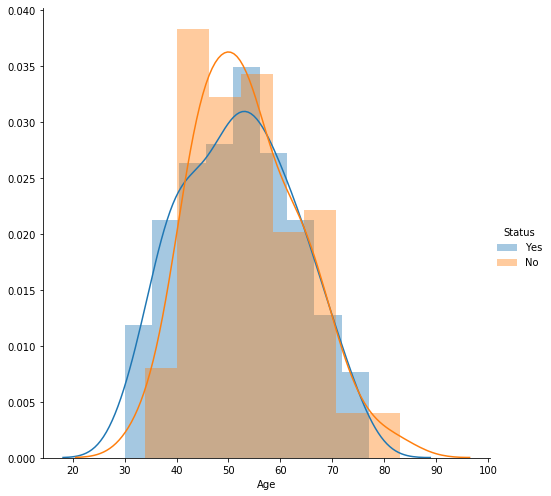

In [13]:
# Facet Grid
# Probability Density Function

sns.FacetGrid(df, hue="Status", height=7).map(sns.distplot, "Age").add_legend()


From the probability density graph we can see that people between the age of 30 to 40 are more likely to survive while people between the age of 41 to 60 are more less likely to survive. People above the age of 60 are equally likely to survive and not survive. 

However, we cannot yet conclude if age really has an influence on the survival rate because there is high overlapping between the two histograms. 

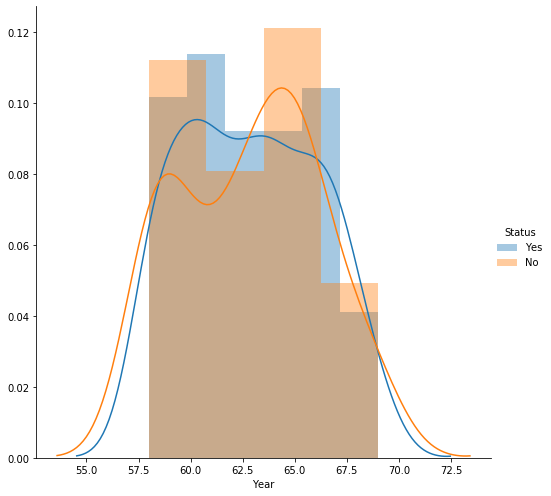

In [14]:
sns.FacetGrid(df, hue="Status", height=7).map(sns.distplot, "Year").add_legend()

There is high overlapping between the two histograms. We can see that the years between 1960 to 1965 had the most number of unsuccessful operations. However, we cannot really say how much influence the operation year has on patient survival rate.

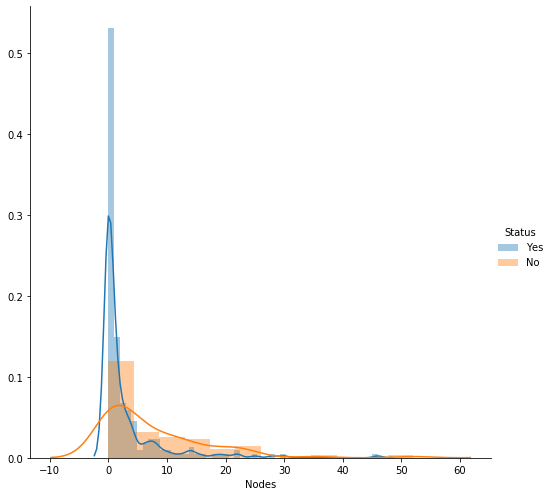

In [15]:
sns.FacetGrid(df, hue="Status", height=7).map(sns.distplot, "Nodes").add_legend()

It is clear from the graph that lesser the number of nodes, greater is the chance of survival. A large percentage of the patients who survived had 0 nodes. However, there is still a small percentage of patients with 0 nodes who did not survive. Hence, absence of nodes does not necessarily guarantee survival. 

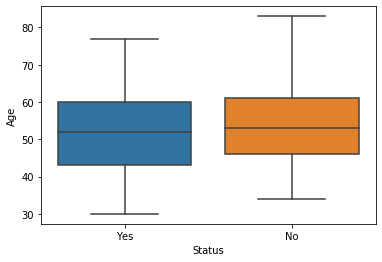

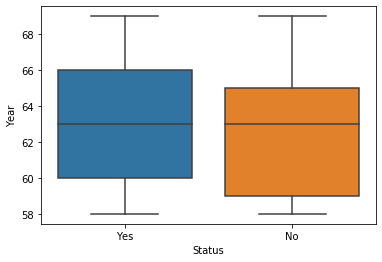

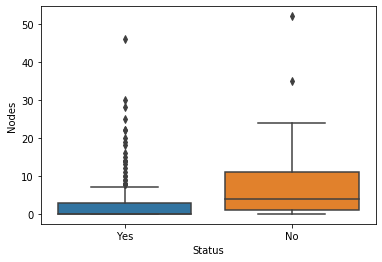

In [16]:
# Boxplots

sns.boxplot(x='Status',y='Age',data=df)
plt.show()
sns.boxplot(x='Status',y='Year',data=df)
plt.show()
sns.boxplot(x='Status',y='Nodes',data=df)
plt.show()

There are outliers in the Node column. However, these outliers may be significant to the dataset, as there may be patients with exceptionally high number of nodes. 

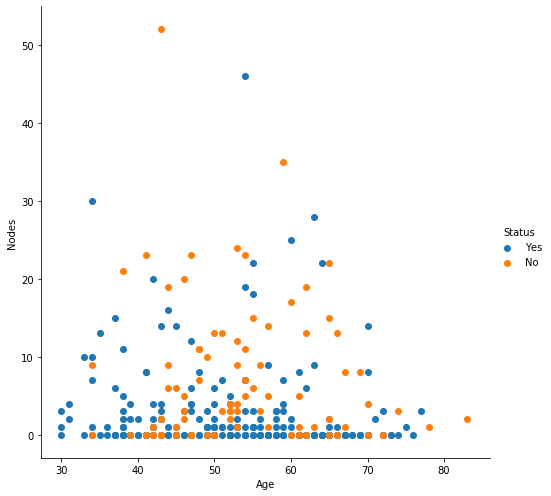

In [17]:
# Scatter plot between Age and Number of nodes

sns.FacetGrid(df, hue="Status", height=7).map(plt.scatter, "Age", "Nodes").add_legend()

From the scatter plot we can conclude that patients who have 0 nodes are more likely to survive irrespective of their age. There are hardly any patients with more than 25 nodes. 
Also, there seems to be no correlation between age and number of nodes

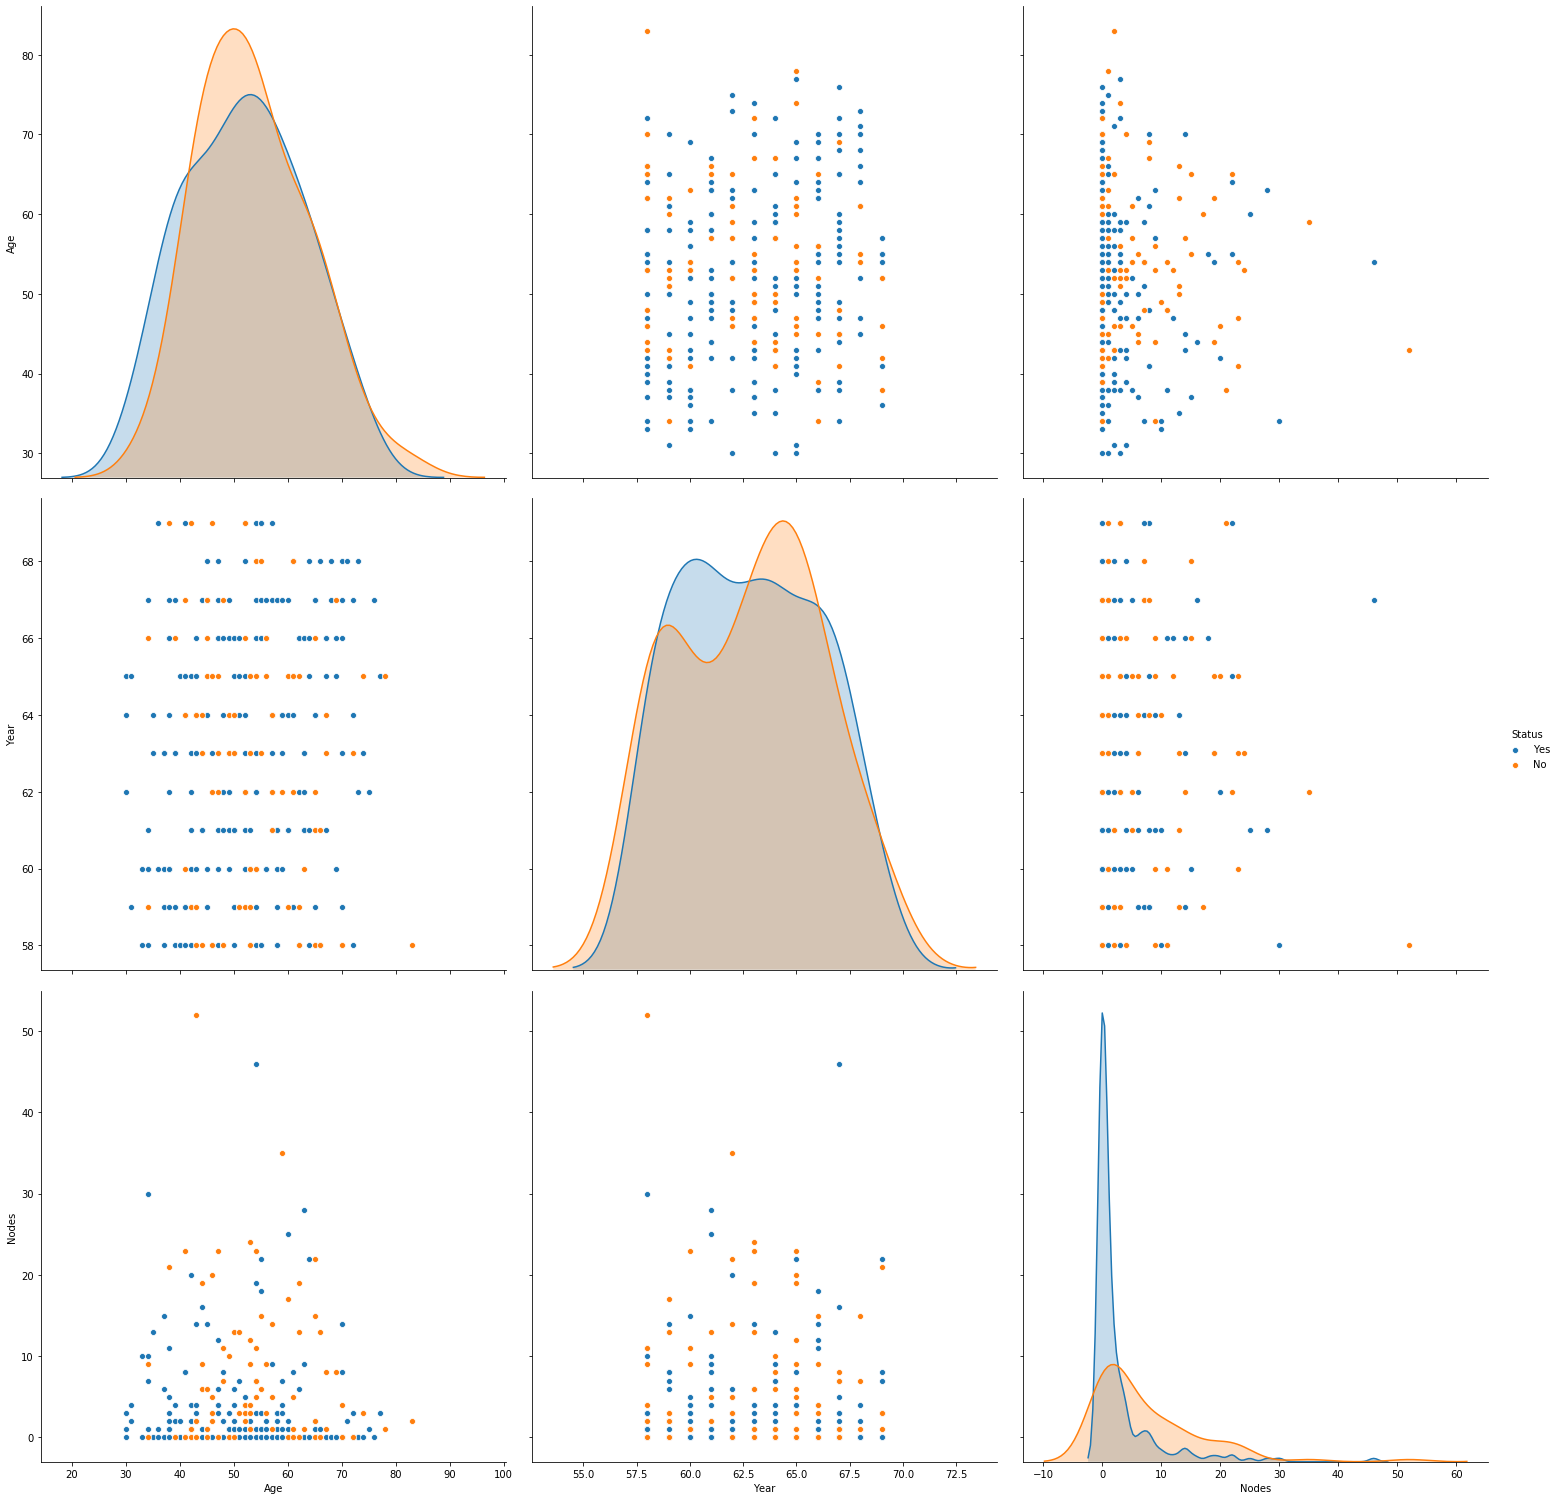

In [18]:
# Pairplot

sns.pairplot(df, hue="Status", height=7)

From all the scatter plots, it is clear that there is no correlation between the features

In [19]:
# Let us look at the correlation coefficients

df.corr()

,Age,Year,Nodes
Age,1.000000,0.089529,-0.063176
Year,0.089529,1.000000,-0.003764
Nodes,-0.063176,-0.003764,1.000000


Hence, both the scatter plot and the correlation coefficients show that there is no correlation between the features

### Hypothesis testing

Some Hypotheses from the dataset:

1) Hypothesis 1

Null Hypothesis: Age is a significant factor in determining whether the patient survival. People between the age of 40 to 60 have 60% chance of not surviving.

Alternate Hypothesis: Age does not have an impact on survival of patients.

2) Hypothesis 2

Null Hypothesis: Number of nodes is a significant factor in determining whether the patient will survive or not because people who have more than 10 nodes have more than 60% chance of not surviving.

Alternate Hypothesis: Number of nodes does not determine survival of patients. 



3) Hypothesis 3

Null Hypothesis: Year of operation is a significant factor in determining whether the patient will survive or not because operations that took place between 1960 to 1965 had more than 60% chance of not surviving.

Alternate Hypothesis: Year of operation does not determine survival of patients. 



#### Hypothesis testing for hypothesis 1.


In [20]:
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [21]:
# We will first create a sample of people between the age group of 40-60.

sample = df[(df['Age'] >= 40) & (df['Age'] <= 60)]

In [22]:
# Percentage of people in the sample who did not survive

p_survived = len(sample[sample['Status']=='No'])/len(sample)
print(p_survived)

0.291005291005291


We see that the percentage of people who did not survive is only 57% which is less than 60%. 
But before we decide whether to accept or reject the null hypothesis, let us perform a hypothesis test

Formula for test statistic = (Best Estimate - Hypothesized estimate)/(Standard error of estimate)

We use this formula for standard error:

standard_error = sqrt(p0(1-p0)n)

In this formula, p0 is 0.60 (according to the null hypothesis) and n is the size of the sample population. Now calculating the Standard error and the test statistics:

In [23]:
se = np.sqrt(0.60 * (1-0.60) / len(sample))

In [24]:
#Best estimate
be = p_survived 

#hypothesized estimate
he = 0.60

test_stat = (be - he)/se

In [25]:
test_stat

-8.67114251538088

In [26]:
# Calculating p-value
pvalue = 2*dist.norm.cdf(-np.abs(test_stat))

In [27]:
pvalue

4.278058553734273e-18

Consider the significance level alpha to be 5% or 0.05. A significance level of 5% or less means that there is a probability of 95% or greater that the results are not random.

Here p-value is bigger than our considered significance level 0.05. So, we cannot reject the null hypothesis.

Hence, we conclude that age does determine chances of survival. Patients between the ages of 40 to 60 have low chances of survival. 


#### Hypothesis test for Hypothesis2

In [28]:
sample2 = df[df['Nodes'] > 10]
p_survived2 = len(sample2[sample2['Status']=='No'])/len(sample2)

se2 = np.sqrt(0.60 * (1-0.60) / len(sample2))

be2 = p_survived2 

he2 = 0.60

test_stat2 = (be2 - he2)/se2

pvalue2 = 2*dist.norm.cdf(-np.abs(test_stat2))

print(pvalue2)

0.7468856333903637


Again, the p-value is bigger than our considered significance level 0.05. So, we cannot reject the null hypothesis.

Hence, we conclude that the number of nodes does determine chances of survival. Patients with more than 10 nodes have a 60% chance of not surviving.

#### Hypothesis test for Hypothesis3

In [29]:
sample3 = df[(df['Year'] >=60) & (df['Year'] <= 65)]
p_survived3 = len(sample3[sample3['Status']=='No'])/len(sample3)

se3 = np.sqrt(0.60 * (1-0.60) / len(sample3))

be3 = p_survived3 

he3 = 0.60

test_stat3 = (be3 - he3)/se3

pvalue3 = 2*dist.norm.cdf(-np.abs(test_stat3))

print(pvalue3)

3.041526467836937e-19


We see that in this case the p-value is significantly smaller than our considered significance level of 0.05. So, we reject the null hypothesis. 

Hence, we conclude that the year in which the operation was conducted does not have an impact on survival rate. 

## Conclusion

From the exploratory data analysis and hypothesis testing, we conclude that age and number of nodes are the two most significant factors that affect patient survival rate. The year in which the operation was performed does not have a statistically significant impact. 

However, it cannot be guaranteed that the result of this data analysis will hold true in the real world because the dataset we used in this analysis was highly imbalanced. Also, the number of features was only three, namely: Age, Number of nodes and Year of Operation. Patient survival rates might be influenced by a number of other factors, which could have been included as features in the dataset. 
